In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_excel("C:/Users/Desktop/ML/14/dataset/Second Experiment/Austrian.xlsx")
df = pd.DataFrame(data)

In [8]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,total_class,Destination,price,Unnamed: 10,Unnamed: 11
0,16:10:00,22:10:00,3,4,1,2,0,222,0,1741.71,NaN,1.0
1,16:15:00,09:15:00,4,5,1,1,1,110,0,149.77,NaN,NaN
2,16:15:00,20:20:00,4,5,1,1,0,220,0,149.77,NaN,NaN
3,16:15:00,20:20:00,4,5,1,1,0,220,0,1122.27,NaN,NaN
4,16:15:00,22:10:00,4,5,1,2,0,222,0,1741.71,NaN,NaN


In [9]:
del df['Unnamed: 10']

In [10]:
del df['Unnamed: 11']

In [11]:
df = df.dropna()

In [12]:
df.shape

(3190, 10)

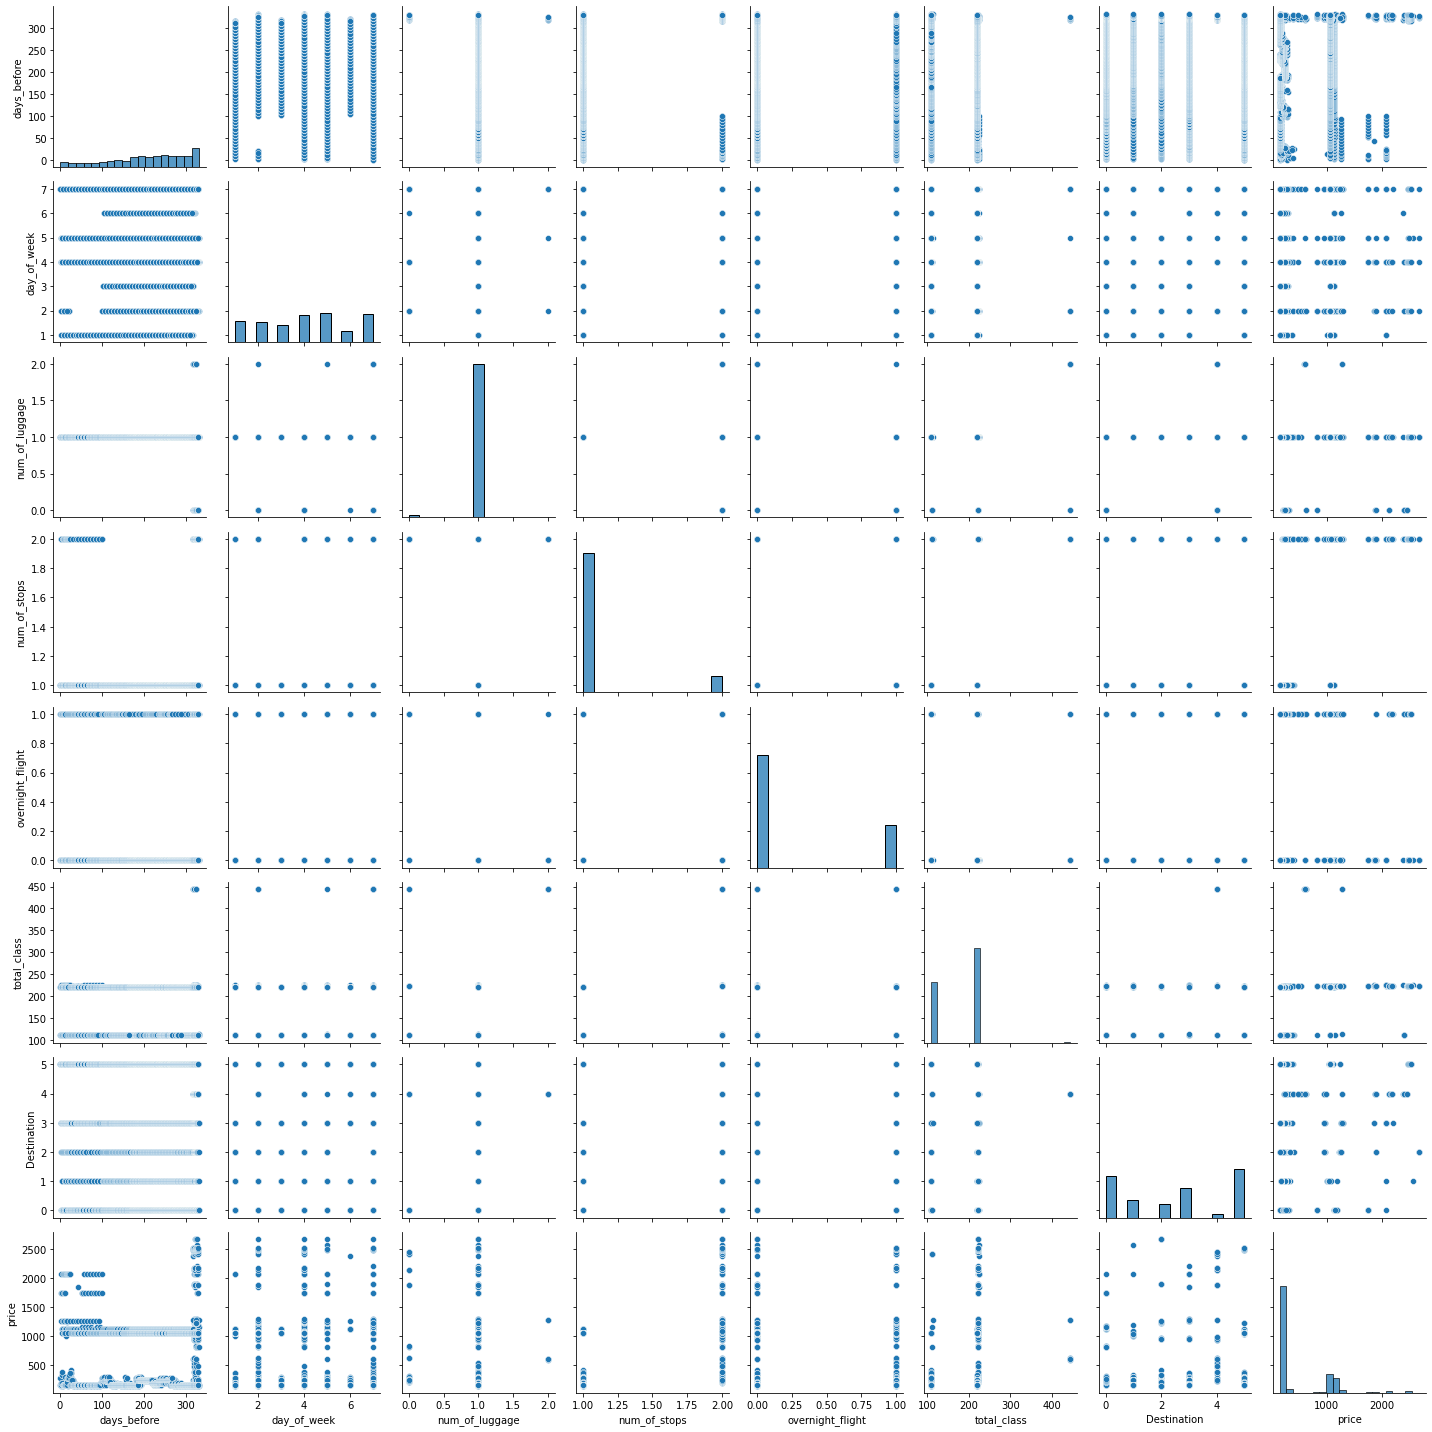

In [13]:
sns.pairplot(df)
plt.tight_layout()

In [14]:
del df['departure_time']

In [15]:
del df['arrival_time']

In [16]:
df.head()

,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,total_class,Destination,price
0,3,4,1,2,0,222,0,1741.71
1,4,5,1,1,1,110,0,149.77
2,4,5,1,1,0,220,0,149.77
3,4,5,1,1,0,220,0,1122.27
4,4,5,1,2,0,222,0,1741.71


In [17]:
df['Destination'].value_counts()

5    1009
0     849
3     606
1     372
2     285
4      69
Name: Destination, dtype: int64

In [18]:
X = df.drop(['price'], axis=1)
y = df['price']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [2]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# SVR

In [17]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: -0.2248443345548483


In [5]:
ab_sc = r2_score(y_test, y_pred)
storeResults('SVR',ab_sc)

# MLP

In [19]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.3524249405015686


In [20]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# QSVR

In [19]:
import numpy as np

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVR, SerializableModelMixin
from qiskit_machine_learning.exceptions import (
    QiskitMachineLearningError,
    QiskitMachineLearningWarning,
)
from qiskit_machine_learning.kernels import QuantumKernel

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [21]:
algorithm_globals.random_seed = 10598
statevector_simulator = QuantumInstance(
            BasicAer.get_backend("statevector_simulator"),
            shots=1,
            seed_simulator=algorithm_globals.random_seed,
            seed_transpiler=algorithm_globals.random_seed,
        )

In [22]:
feature_map = ZZFeatureMap(feature_dimension=7, reps=2)

In [23]:
qkernel = QuantumKernel(
            feature_map=feature_map, quantum_instance=statevector_simulator
        )

In [24]:
qsvr = QSVR(quantum_kernel=qkernel)

In [25]:
qsvr.fit(X_train, y_train)

QSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
     max_iter=-1,
     quantum_kernel=<qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x0000021CA293A048>,
     shrinking=True, tol=0.001, verbose=False)

In [26]:
labelsTest = qsvr.predict(X_test)

In [39]:
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, labelsTest)))

Accuracy score of the predictions: -0.2435838492103708


In [21]:
qsvr_sc = r2_score(y_test, labelsTest)
storeResults('QSVR',qsvr_sc)

# QMLP

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [28]:
x_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

In [29]:
X_train = X_train[0:2552]

In [30]:
from skqulacs.circuit.pre_defined import create_qcl_ansatz # Prefer to choose this circuit
from skqulacs.circuit import create_ibm_embedding_circuit
from skqulacs.qnn.solver import Bfgs, Adam, NelderMead
from numpy.random import default_rng

In [31]:
from skqulacs.qnn import QNNRegressor

n_qubit = 5
depth = 3
time_step = 0.5#0.305
solver = Bfgs() #Adam()  #NelderMead() #Bfgs()
maxiter= 200

In [32]:
circuit = create_qcl_ansatz(n_qubit, depth, time_step, 0)
model = QNNRegressor(circuit, solver,  cost= 'mse', do_x_scale = True, do_y_scale = True, x_norm_range =0.6, y_norm_range = 0.7)

In [33]:
opt_loss, theta = model.fit(X_train, y_train, maxiter)

In [34]:
x_test = x_test[0:638]

In [35]:
y_pred = model.predict(x_test)

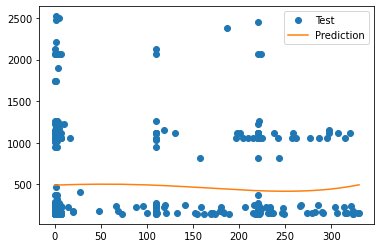

In [36]:
plt.plot(x_test, y_test, "o", label="Test")
plt.plot(np.sort(np.array(x_test).flatten()), np.array(y_pred)[np.argsort(np.array(x_test).flatten())], label="Prediction")
plt.legend()
plt.show()

In [37]:
rmse = 0

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print('qubit = ',n_qubit,', depth = ', depth)
print('RMSE = ',rmse(y_pred,y_test))

from sklearn.metrics import mean_absolute_percentage_error
print('MAPE = ',mean_absolute_percentage_error(y_test, y_pred))

qubit =  5 , depth =  3
RMSE =  493.35653913622855
MAPE =  1.3512780588155753


In [38]:
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: -0.00852530448965605


In [22]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('QMLP',mlp_sc)

# Comparison

In [23]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [24]:
result

,ML Model,R2-Score
0,SVR,0.220
1,MLP,0.352
2,QSVR,0.352
3,QMLP,0.080


# Graph

In [25]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

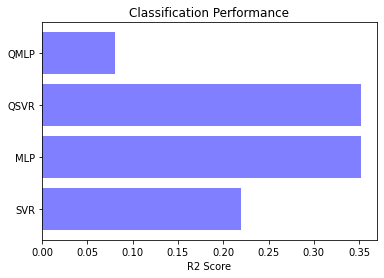

In [26]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()